In [99]:
import torch
import numpy as np
import torchvision as tv
from torch import nn
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
BATCH_SIZE=256

In [101]:
train_dataset = tv.datasets.FashionMNIST('.', train=True, transform=tv.transforms.ToTensor(), download=True)
test_dataset = tv.datasets.FashionMNIST('.', train=False, transform=tv.transforms.ToTensor(), download=True)
train_iter = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test_iter = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

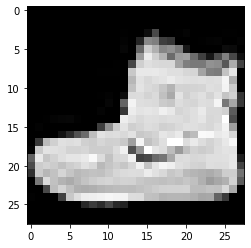

In [102]:
plt.imshow(train_dataset[0][0].numpy().reshape(28,28), cmap='gray')

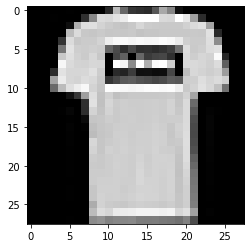

In [103]:
plt.imshow(train_dataset[1][0].numpy().reshape(28,28), cmap='gray')

## Модель

In [142]:
model = nn.Sequential(
    nn.Conv2d(1, 8, kernel_size=5, padding=3),
    nn.ReLU(),
    nn.MaxPool2d(2, stride=2),
    nn.Conv2d(8, 16, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(2, stride=2),
    nn.Flatten(),
    nn.Linear(400, 200),
    nn.ReLU(),
    nn.Linear(200, 50),
    nn.ReLU(),
    nn.Linear(50, 10)
)

In [143]:
from torchsummary import summary

summary(model, input_size=(1, 28, 28), device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 30, 30]             208
              ReLU-2            [-1, 8, 30, 30]               0
         MaxPool2d-3            [-1, 8, 15, 15]               0
            Conv2d-4           [-1, 16, 11, 11]           3,216
              ReLU-5           [-1, 16, 11, 11]               0
         MaxPool2d-6             [-1, 16, 5, 5]               0
           Flatten-7                  [-1, 400]               0
            Linear-8                  [-1, 200]          80,200
              ReLU-9                  [-1, 200]               0
           Linear-10                   [-1, 50]          10,050
             ReLU-11                   [-1, 50]               0
           Linear-12                   [-1, 10]             510
Total params: 94,184
Trainable params: 94,184
Non-trainable params: 0
---------------------------------

In [144]:
def evaluate_accuracy(data_iter, net):
    acc_sum, n = torch.Tensor([0]), 0
    for X, y in data_iter:
        acc_sum += (net(X).argmax(axis=1) == y).sum()
        n += y.shape[0]
    return acc_sum.item() / n

In [145]:
def train(net, train_iter, test_iter, optimizer, num_epochs):
    loss = nn.CrossEntropyLoss()

    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n, start = 0.0, 0.0, 0, time.time()
    
        for X, y in train_iter:
            optimizer.zero_grad()
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(axis=1) == y).sum().item()
            n += y.shape[0]
      
        test_acc = evaluate_accuracy(test_iter, net)
        print(f'epoch {epoch + 1}, loss {train_l_sum / n:.4f}, train acc {train_acc_sum / n:.3f}' \
              f', test acc {test_acc:.3f}, time {time.time() - start:.1f} sec')

In [146]:
lr, num_epochs = 0.01, 20
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
train(model, train_iter, test_iter, optimizer, num_epochs)

epoch 1, loss 0.0022, train acc 0.786, test acc 0.836, time 22.1 sec
epoch 2, loss 0.0013, train acc 0.875, test acc 0.855, time 22.1 sec
epoch 3, loss 0.0012, train acc 0.889, test acc 0.873, time 24.3 sec
epoch 4, loss 0.0011, train acc 0.899, test acc 0.888, time 22.1 sec
epoch 5, loss 0.0010, train acc 0.906, test acc 0.875, time 22.1 sec
epoch 6, loss 0.0010, train acc 0.909, test acc 0.892, time 23.0 sec
epoch 7, loss 0.0009, train acc 0.912, test acc 0.887, time 22.1 sec
epoch 8, loss 0.0009, train acc 0.915, test acc 0.889, time 22.0 sec
epoch 9, loss 0.0009, train acc 0.917, test acc 0.893, time 23.0 sec
epoch 10, loss 0.0008, train acc 0.922, test acc 0.892, time 22.9 sec
epoch 11, loss 0.0008, train acc 0.923, test acc 0.896, time 23.0 sec
epoch 12, loss 0.0008, train acc 0.924, test acc 0.889, time 22.2 sec
epoch 13, loss 0.0008, train acc 0.926, test acc 0.885, time 22.3 sec
epoch 14, loss 0.0008, train acc 0.927, test acc 0.889, time 23.4 sec
epoch 15, loss 0.0007, train 